### A/B tests about size of pics of cafe menu and app button. 
### What size will be more beneficial - 16:9 or 12:4 or squared? 
### Does the format of the app button will affect on sales or not?

In [1]:
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.api as sms

In [4]:
df_1 = pd.read_csv('../Lesson_5/5_task_1.csv')
df_1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


#### Check variances with Levene test for equal variances

In [24]:
event_A = df_1[df_1['group']=='A'].events
event_B = df_1[df_1['group']=='B'].events
event_C = df_1[df_1['group']=='C'].events

In [25]:
sc.stats.levene(event_A, event_B, event_C)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

#### Variances are equal, because the null hypothesis of Levene test is variances are equal. Pvalue > 0.05

#### Check distributions on distribution normality with Shapiro test:

In [32]:
sc.stats.shapiro(event_A.sample(1000, random_state=17))

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [33]:
sc.stats.shapiro(event_B.sample(1000, random_state=17))

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [34]:
sc.stats.shapiro(event_C.sample(1000, random_state=17))

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

#### Our data distributed normally

#### Compare three groups with normal distributions with ANOVA:

In [35]:
sc.stats.f_oneway(event_A, event_B, event_C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

#### Groups statistically differ. Which groups exactly? 

#### Apply Tukey criteria for ANOVA:

In [40]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [38]:
print(pairwise_tukeyhsd(df_1.events, df_1.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [39]:
# OR

MultiComp = MultiComparison(df_1.events, df_1.group)
print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


#### We have statistically significant differences in all cases. Reject null hypothesis. Let's verify this result with two-sampled T-test for independent samples. Also we defined the most different group - B. This is the most attractive size of photos in the menu for visitors.

In [41]:
sc.stats.ttest_ind(event_A, event_B)

Ttest_indResult(statistic=-57.01113423437213, pvalue=0.0)

In [45]:
sc.stats.ttest_ind(event_C, event_A)

Ttest_indResult(statistic=-14.886135128440298, pvalue=7.500261656295871e-50)

In [43]:
sc.stats.ttest_ind(event_C, event_B)

Ttest_indResult(statistic=-72.42022029192773, pvalue=0.0)

#### Verified

### Does the format of the app button will affect on sales or not?
#### Visualize the data for two groups: 

In [67]:
sns.set(font_scale = 1, 
        style      = 'whitegrid', 
        rc         = {'figure.figsize': (20, 7)}
       )

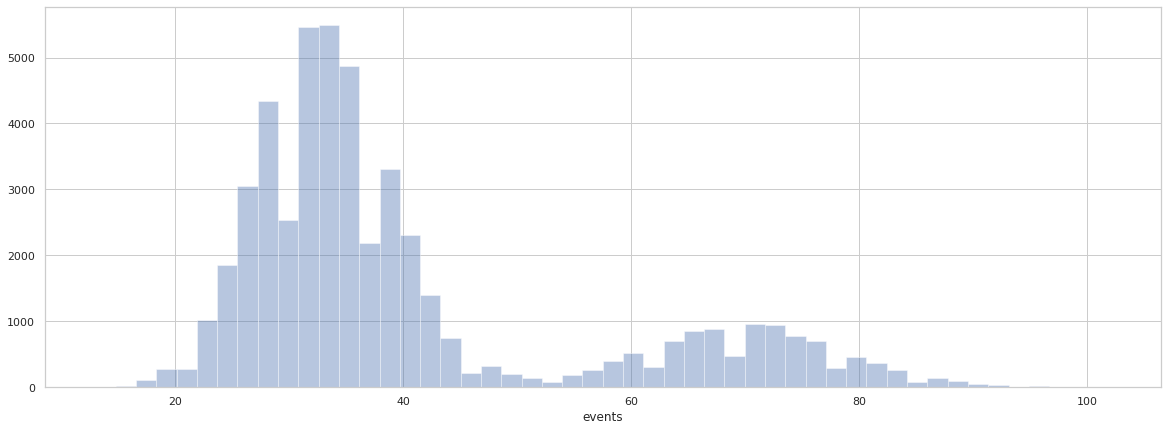

In [71]:
sns.distplot(df_2[df_2['group'] == 'test'].events, kde = False)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


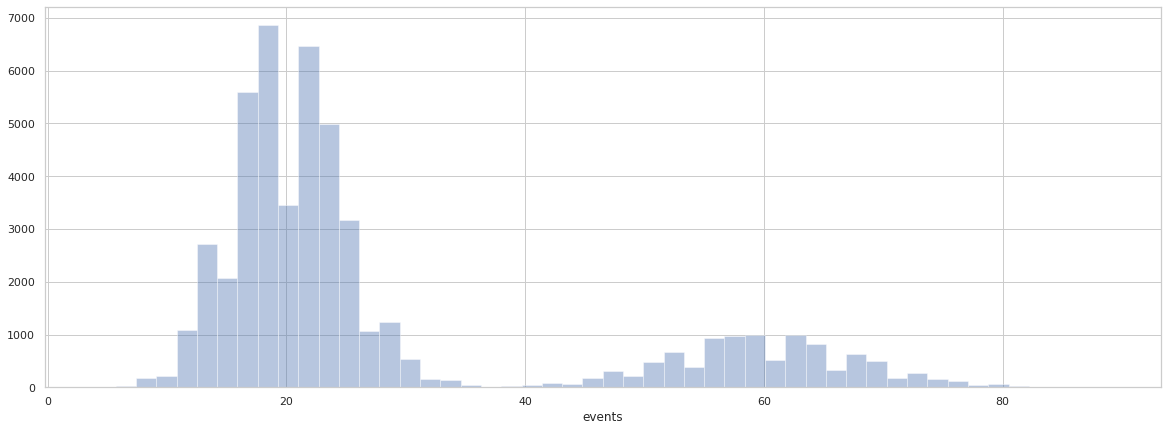

In [70]:
sns.distplot(df_2[df_2['group'] == 'control'].events, kde = False)

In [133]:
df_2 = pd.read_csv('../Lesson_5/5_task_2.csv')
df_2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


#### Analyze with multifactorial ANOVA (impact of segment, group and segment on group on events) using Tukey criteria

In [34]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'events ~ segment + group + segment:group'
model = ols(formula, df_2).fit()
aov_table = anova_lm(model, typ=2)

In [35]:
aov_table

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


#### We have statistically significant differences at all. 

#### For further comparisons we have to concatenate group and segment columns

In [ ]:
+-------+---------+-------------+
| group | segment | combination |
+-------+---------+-------------+
| test  | high    | test / high |
| test  | high    | test / high |
+-------+---------+-------------+

df_2['combination'] = df_2['group'] + ' / ' + df_2['segment']
df_2

In [41]:
print(pairwise_tukeyhsd(df_2.events, df_2.combination))

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control / high control / low -39.9392 0.001 -40.1073 -39.7711   True
control / high   test / high   9.9677 0.001   9.7551  10.1803   True
control / high    test / low -26.9449 0.001  -27.113 -26.7768   True
 control / low   test / high  49.9069 0.001  49.7388   50.075   True
 control / low    test / low  12.9944 0.001   12.888  13.1007   True
   test / high    test / low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


In [ ]:
# OR:

In [42]:
MultiComp = MultiComparison(df_2.events, df_2.combination)
print(MultiComp.tukeyhsd().summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control / high control / low -39.9392 0.001 -40.1073 -39.7711   True
control / high   test / high   9.9677 0.001   9.7551  10.1803   True
control / high    test / low -26.9449 0.001  -27.113 -26.7768   True
 control / low   test / high  49.9069 0.001  49.7388   50.075   True
 control / low    test / low  12.9944 0.001   12.888  13.1007   True
   test / high    test / low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


#### Outcome: all metrics increased statistically significant compared with control group. We have to deploy new app button design.

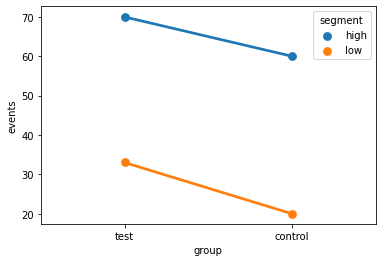

In [45]:
sns.pointplot(x = 'group', y = 'events', data = df_2, hue = 'segment')